![Astrofisica Computacional](../logo.png)

---
## 06. Introduction to `Matplotlib`

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we present an introduction to the package `matplotlib`

---

In [1]:
%matplotlib inline
import matplotlib as ml
import numpy as np
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

rng = np.random.default_rng(413)  # initialise our random number generator

In [2]:
n = 100
xs = np.linspace(0, 2*np.pi, n)
ys = np.sinc(xs)

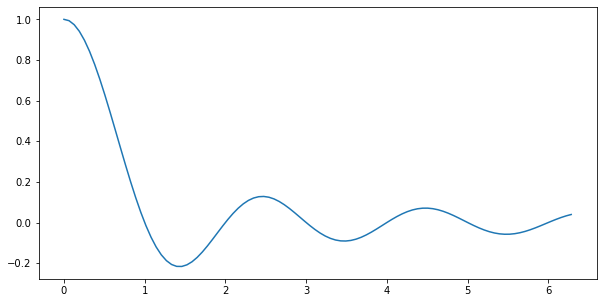

In [3]:
plt.plot(xs, ys)
plt.show()

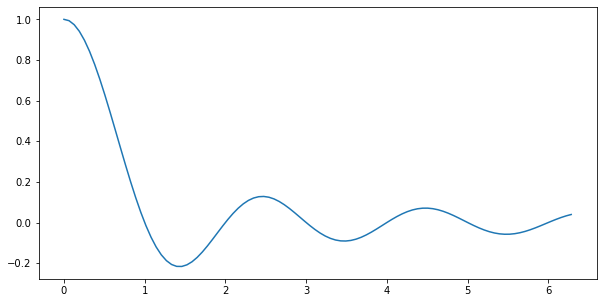

In [4]:
plot = plt.plot(xs, ys) # Plots are objects!

In [5]:
plot

In [6]:
fig = plt.figure() # Figure is the canvas and it is also an object

<Figure size 720x360 with 0 Axes>

In [7]:
ax = fig.add_axes([0, 0, 1, 1]) # Add axes with specified ranges [xi,yi,xf,yf]

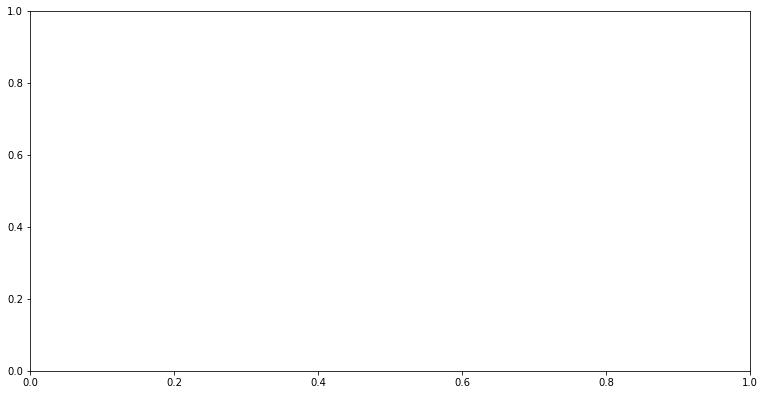

In [8]:
fig # Shows the canvas updated

In [9]:
ax.scatter(xs, ys, label="Star 01") # Add a scatter plot (with a label) to the axes

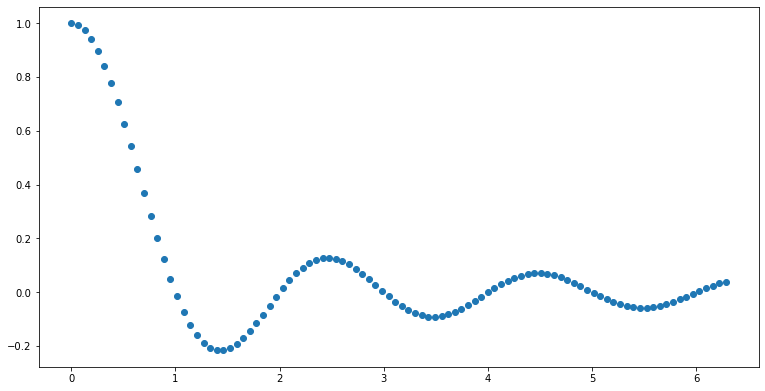

In [10]:
fig 

In [11]:
sub_ax = fig.add_axes([0.5, 0.5, 0.4, 0.4]) # We may add sub-axes to the plot

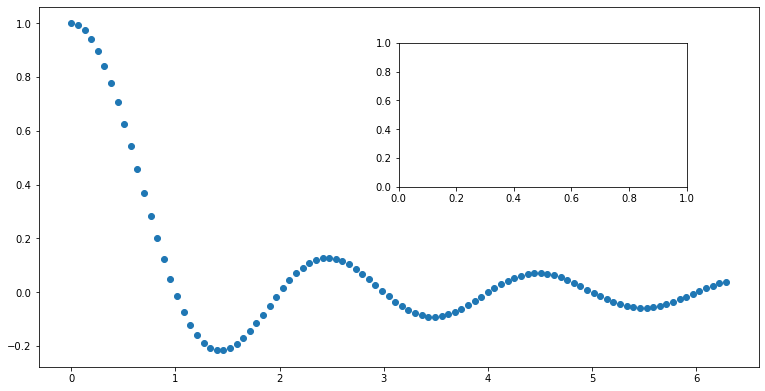

In [12]:
fig

In [13]:
# Plot in the sub-axes
sub_ax.plot(xs, np.sin(xs), color="salmon", label="Star 02")
sub_ax.plot(xs, np.sin(xs)*0.9, color="steelblue", linestyle="-.", label="Star modified")

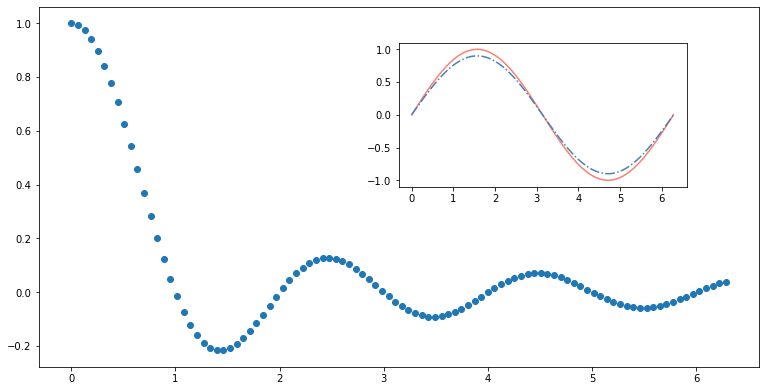

In [14]:
fig

In [15]:
# Add some labels to ax
ax.set_xlabel(r'time [s]')
ax.set_ylabel(r'Intensity [W/$m^2$]')

Text(3.1999999999999957, 0.5, 'Intensity [W/$m^2$]')

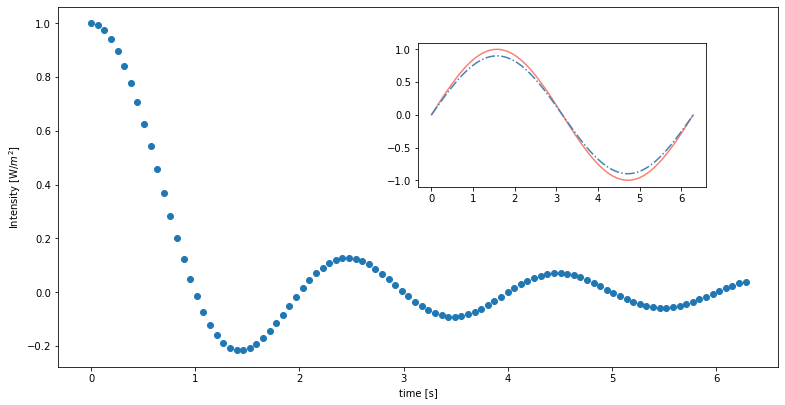

In [16]:
fig

In [17]:
# Add some labels to the sub_ax
sub_ax.set_xlabel(r'time [s]')
sub_ax.set_ylabel(r'Intensity [W/$m^2$]')

Text(383.0, 0.5, 'Intensity [W/$m^2$]')

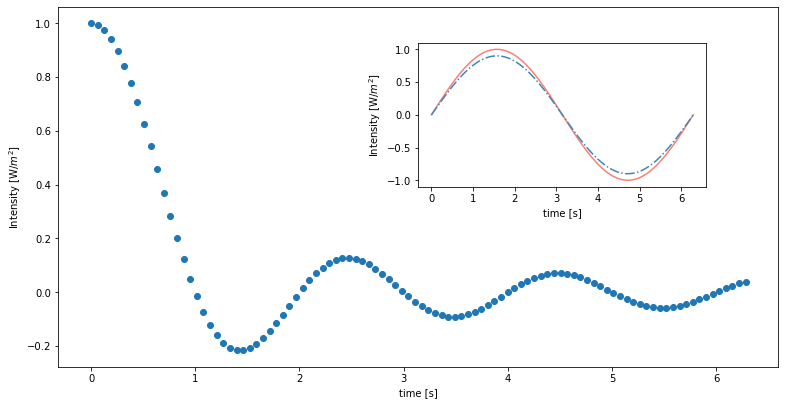

In [18]:
fig

In [24]:
# Show the labels of the plots in ax
ax.legend()

In [20]:
# Show the labels of the plots in sub_ax
sub_ax.legend()

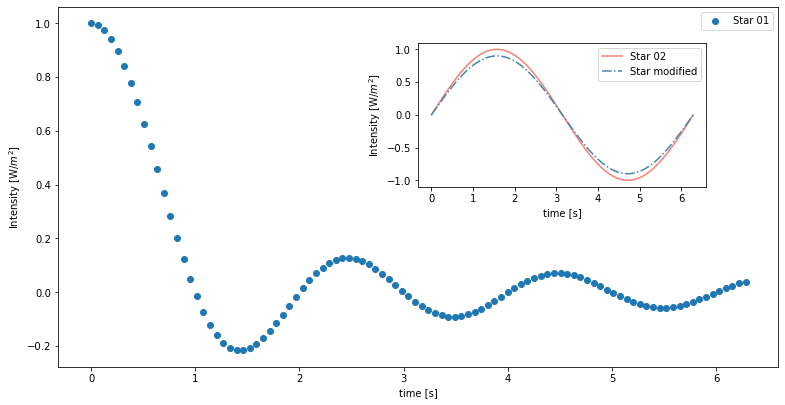

In [21]:
fig

In [22]:
ax.plot(xs, np.cos(xs),'k',label='Cos Function')

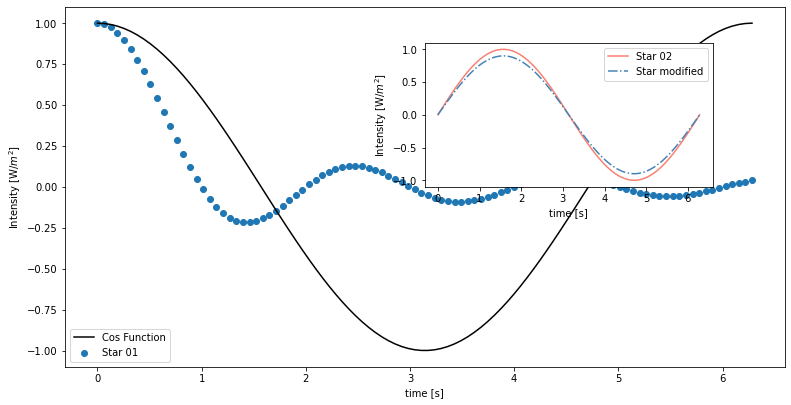

In [25]:
fig

In [26]:
# Add a horizontal line to tax
ax.axhline(0.15, linestyle=":", color="#aabbcc")

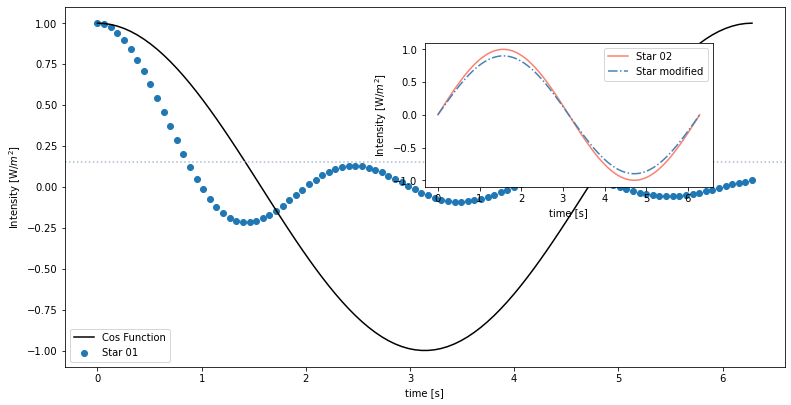

In [27]:
fig

In [28]:
time_of_interest = 2.13  # time [s]

In [29]:
# Characteristics of the line we want to draw
opts = dict(linestyle="-", color="deepskyblue", linewidth=2)
# Add a vertical line at the time of interest using the options
ax.axvline(time_of_interest, **opts)
# dd the line also to the sub_ax
sub_ax.axvline(time_of_interest, **opts)

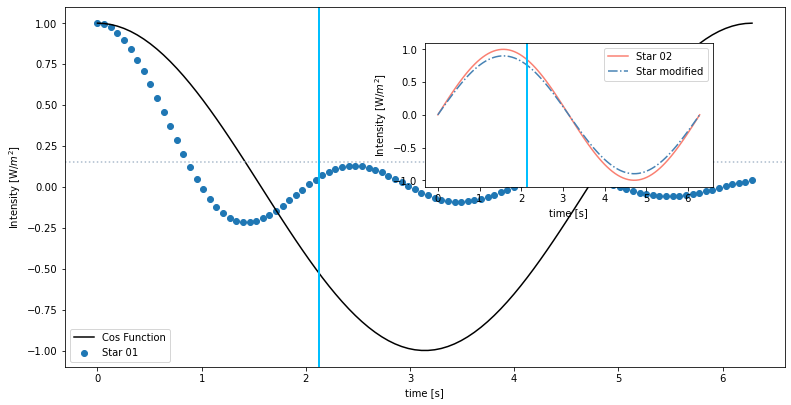

In [30]:
fig

In [31]:
# Add a grid to ax and sub_ax
ax.grid(color="#dddddd")
sub_ax.grid(color="slategrey")

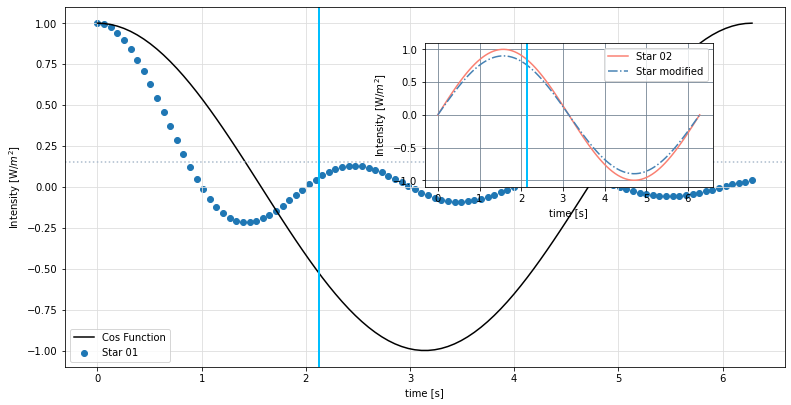

In [32]:
fig

In [33]:
# Set font size of the labels in ax
for axis in [ax.xaxis, ax.yaxis]:
    axis.label.set_fontsize(20)

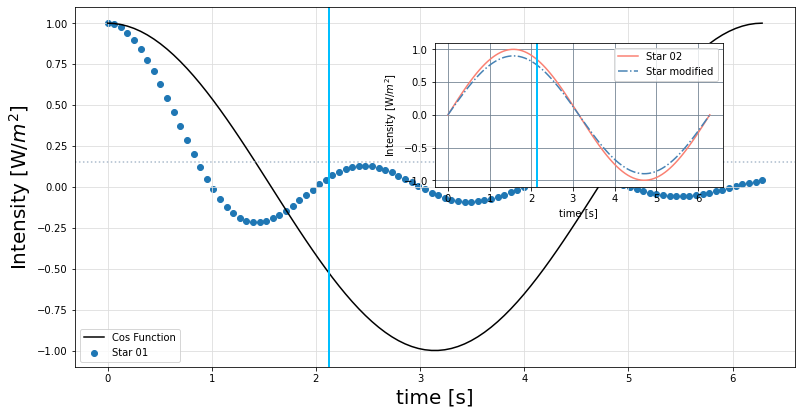

In [34]:
fig

In [39]:
# Change the position and/or size of the sub_ax
sub_ax.set_position([0.45, 0.4, 0.5, 0.5])

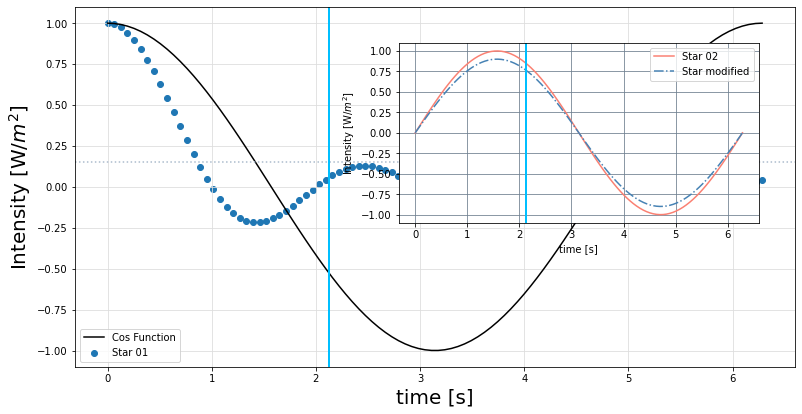

In [40]:
fig

We will find the maxima in the plot using the function `scipy.signal.find_peaks_cwt()`

In [41]:
import scipy.signal
peak_idx = scipy.signal.find_peaks_cwt(ys, np.arange(1, 5))

In [42]:
peak_idx # These are the indices of the maximum points

array([ 1,  2,  3,  4, 38, 70, 71, 98])

In [43]:
# Plot the maximum points in red
ax.scatter(xs[peak_idx], ys[peak_idx], c="red", marker="X", s=100)

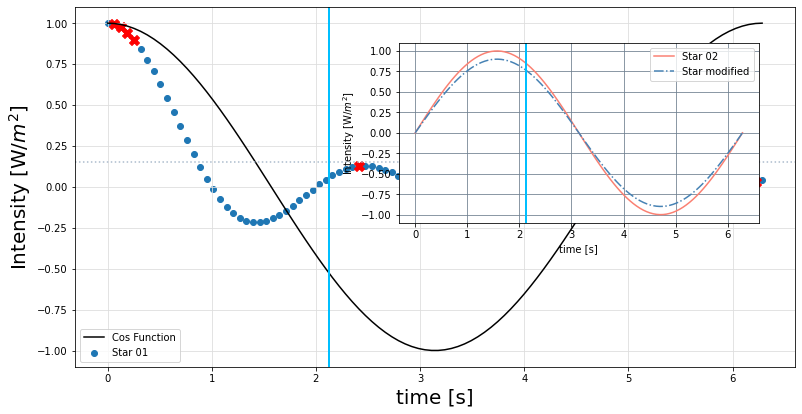

In [44]:
fig

In [45]:
# Save the plot. The filename extension defines the media type
fig.savefig("plot.pdf", bbox_inches="tight")  

In [46]:
fig.savefig("plot.png", bbox_inches="tight")

In [47]:
fig.savefig("plot.jpg", bbox_inches="tight")

## Subplots

The `plt.subplots()` utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

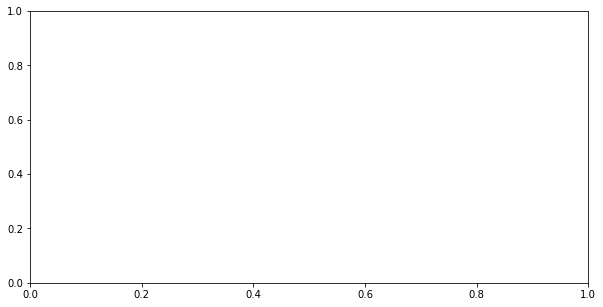

In [48]:
fig, ax = plt.subplots()  # This single command creates a figure with an axes

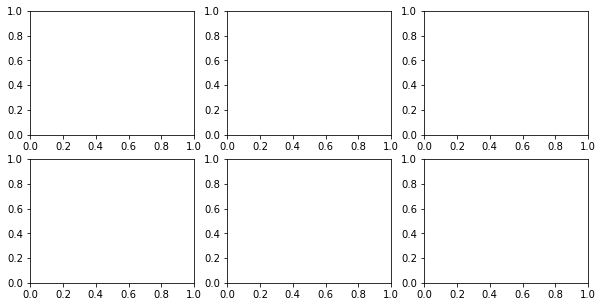

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3) # Create 6 axes in a figure

In [50]:
axes # axes is an array |

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [51]:
axes[0] # Row of axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [52]:
axes[1]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [53]:
axes[0, 2].scatter(xs, np.cos(xs)) # Scatter plot in one of the axes

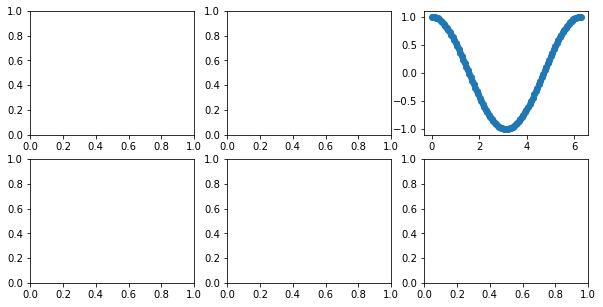

In [54]:
fig

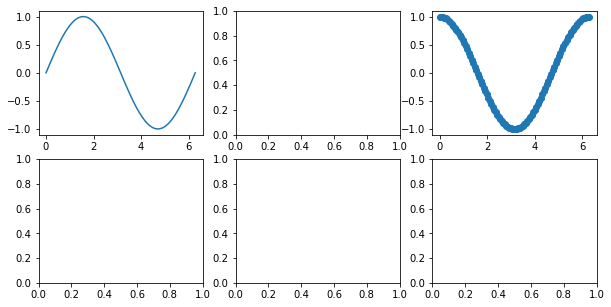

In [55]:
axes[0, 0].plot(xs, np.sin(xs)) # Scatter plot in one of the axes
fig

In [58]:
axes.flat[4].scatter(xs, ys, color='cornflowerblue') # the .flat[] method acces the plots with only one index

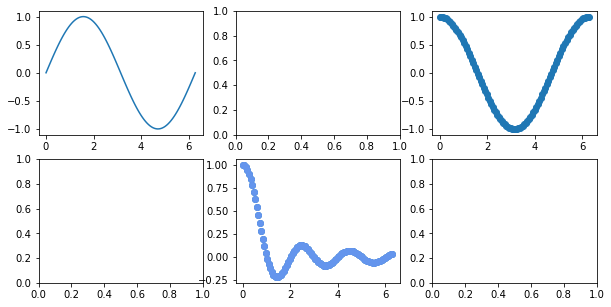

In [59]:
fig

In [60]:
# Defines 6 colors from the viridis color map
colors = plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

# 6 plots, on in each ax using the colors defined above
for func, ax, color in zip([np.cos, np.sin, np.sinc, np.tan, np.tanh, np.exp], axes.flat, colors):
    ax.plot(xs, func(xs), color=color)

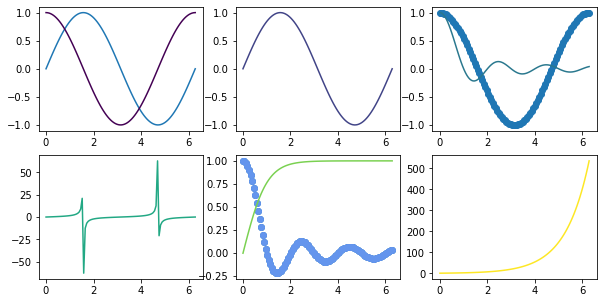

In [61]:
fig

In [62]:
# These are the colors defined in the viridis color map
# They are given in rgb-alpha coding
plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [65]:
# a single color identified with the label 0.5 in the viridis color map
plt.cm.viridis(0.766) 

(0.404001, 0.800275, 0.362552, 1.0)

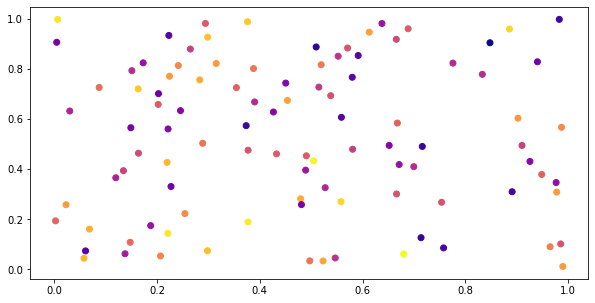

In [66]:
fig, ax = plt.subplots()
n = 100
xs = rng.random(n)
ys = rng.random(n)
ms = rng.random(n)
ax.scatter(rng.random(n), rng.random(n), c=ms, cmap="plasma")

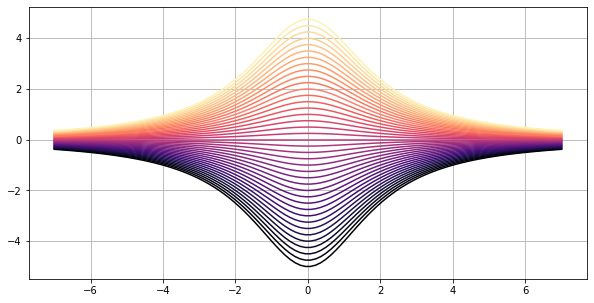

In [67]:
fig, ax = plt.subplots()

n = 100
xs = np.linspace(-7, 7, n)

N = 40
colors = iter(plt.cm.magma(np.linspace(0, 1, N)))

for k in range(-N//2, N//2):
    color = "salmon" if k == 8 else next(colors)
    ax.plot(xs, k / (xs**2 + 4), c=color)
    
ax.grid()

## Histograms

The `numpy.random.normal(loc, scale, size)`function has the arguments:

- loc : centre of the distribution 
- scale: standard deviation or spread of the distribution
- size : shape of the distribution

In [68]:
# Random data(Normal distribution)
data1 = rng.normal(23, 5, 1000) 
data2 = rng.normal(42, 5, 10000)

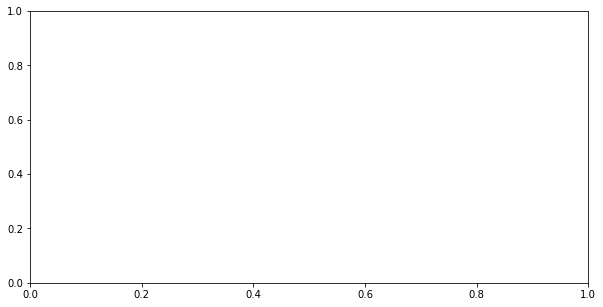

In [69]:
fig, ax = plt.subplots() # Create the canvas

In [70]:
# Histogram of the random data
ax.hist(data1, bins=100)
ax.hist(data2, bins=100)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   4.,   4.,   4.,
          8.,   6.,   7.,   9.,  13.,  14.,  13.,  17.,  21.,  26.,  28.,
         42.,  34.,  45.,  56.,  61.,  65.,  95., 109.,  91., 116., 138.,
        147., 174., 172., 171., 179., 226., 233., 224., 245., 293., 276.,
        297., 270., 245., 326., 286., 297., 315., 286., 297., 256., 251.,
        276., 259., 283., 258., 221., 215., 222., 181., 156., 176., 151.,
        129., 124., 105., 102.,  91.,  85.,  69.,  65.,  56.,  42.,  32.,
         31.,  33.,  22.,  17.,  15.,  11.,  16.,  11.,   6.,   7.,   9.,
          6.,   2.,   3.,   5.,   3.,   2.,   2.,   1.,   1.,   0.,   0.,
          3.]),
 array([23.18488991, 23.5632329 , 23.94157589, 24.31991888, 24.69826187,
        25.07660486, 25.45494784, 25.83329083, 26.21163382, 26.58997681,
        26.9683198 , 27.34666279, 27.72500578, 28.10334877, 28.48169175,
        28.86003474, 29.23837773, 29.61672072, 29.99506371, 30.3734067 ,
        30.75174969, 31.13

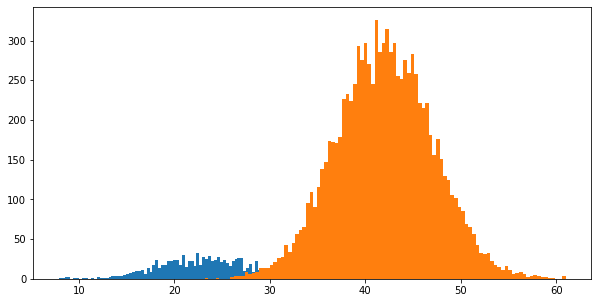

In [71]:
fig

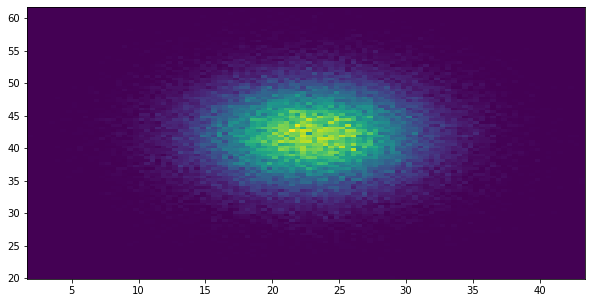

In [75]:
N = 100000

data1 = rng.normal(23, 5, N)
data2 = rng.normal(42, 5, N)

fig, ax = plt.subplots()

# 2-dimensional histogram
ax.hist2d(data1, data2, bins=100);